In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
x = np.array([[0, 2], [1, 2], [-1, 0], [4, 0], [3,0],[1, -1], [4, -1]])
#y = np.array([0, 0, 1, 1, 1, 0, 0])
y = np.array([0, 1, 0, 1, 1, 1, 1])

In [3]:
def log_loss(W, X, y):
    y1 = np.asmatrix(y)
    return -1*(y1*np.log(sigmoid(W.T*X.T).T) + (1 - y1)*np.log(1 - sigmoid(W.T*X.T).T))

def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [4]:
def plot_logistic_regression(x1=None, x2=None, y=None, w0=0, w1=0, w2=0, show_loss=False, ax=None):
    markers = ['D', 'x']
    colors = ['r', 'b']
    
    epsilon = 0.2
    
    x1_min = np.min(x1) - epsilon
    x1_max = np.max(x1) + epsilon
    x2_min = np.min(x2) - epsilon
    x2_max = np.max(x2) + epsilon
    
    n = x1.shape[0]
    
    l = log_loss(np.matrix([w0, w1, w2]).T, np.matrix([np.ones(n), x1, x2]).T, np.asmatrix(y))[0,0]
    if show_loss:
        print('Loss: %s' % l)

    xx1, xx2 = np.mgrid[x1_min:x1_max:0.01, x2_min:x2_max:0.01]
    
    z = sigmoid(w0 + w1*xx1 + w2*xx2)

    ax = ax or plt.gca()
    
    epsilon = 0.1
    contour = ax.contourf(xx1, xx2, z, 25, cmap="RdBu",
                      vmin=0, vmax=1)
    
    ax_c = plt.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.set(aspect="equal",
    xlim=(x1_min, x1_max), ylim=(x2_min, x2_max),
    xlabel="$X_1$", ylabel="$X_2$")
    
    for i in range(n):
        ax.scatter(x1[i], x2[i], c=colors[y[i]], linewidths=3, alpha=1)
    
    plt.show()    

In [5]:
%matplotlib inline

from ipywidgets import interact, fixed
import ipywidgets as widgets

ww0 = widgets.FloatSlider(min=-5, max=5)
ww1 = widgets.FloatSlider(min=-5, max=5)
ww2 = widgets.FloatSlider(min=-5, max=5)
show_loss = widgets.Checkbox(description='Show loss')

interact(plot_logistic_regression, x1=fixed(x[:,0]), x2=fixed(x[:,1]), y=fixed(y), w0=ww0, w1=ww1, w2=ww2, show_loss=show_loss, ax=fixed(None));

interactive(children=(FloatSlider(value=0.0, description='w0', max=5.0, min=-5.0), FloatSlider(value=0.0, desc…

In [6]:
# Learn a model
clf = LogisticRegression().fit(x, y)

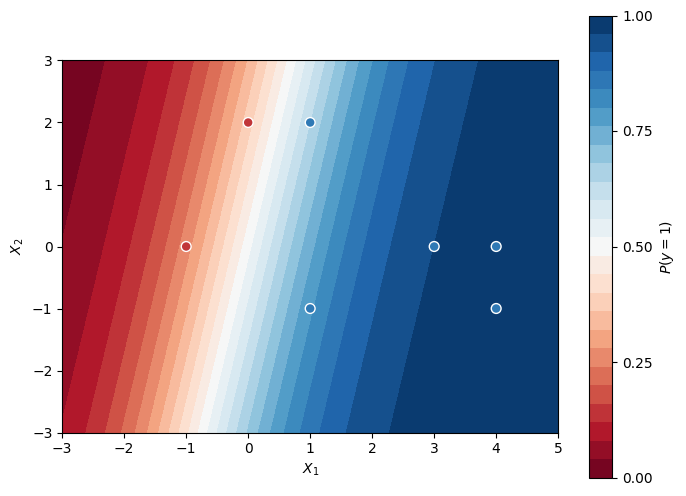

In [7]:
xx, yy = np.mgrid[-3:5:.01, -3:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape) # Predict

# Plot the model
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(x[:,0], x[:, 1], c=y[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-3, 5), ylim=(-3, 3),
       xlabel="$X_1$", ylabel="$X_2$")

plt.show()

In [8]:
clf.intercept_ # Print the intercept

array([0.01177916])

In [9]:
clf.coef_ # Print other weights

array([[ 1.05579414, -0.25303245]])